# Inspect cross-immunity function output

Visualize the range of outputs from the cross-immunity function for a range of input values.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import sys

%matplotlib inline

plt.style.use("huddlej")

In [2]:
pwd

'/Users/jlhudd/projects/nextstrain/flu-forecasting/analyses'

In [3]:
sys.path.insert(0, "../src")

In [4]:
from forecast.fitness_predictors import inverse_cross_immunity_amplitude

In [5]:
def cross_immunity(d_ep, d_init):
    return np.exp(-d_ep / d_init)

In [6]:
d_init = 14.0

In [7]:
inverse_cross_immunity_amplitude?

Signature: inverse_cross_immunity_amplitude(d_ep, d_init)
Docstring:
Return the inverse cross-immunity amplitude corresponding to the given
epitope distance between two amino acid sequences and a predetermined
scaling parameter that controls the time period across which cross-immunity
decays.

Note that this implementation differs from Luksza and Lassig in that
decaying cross-immunity is measured on a scale of 0 - 1 where no epitope
differences correspond to a cross-immunity of 1 and more mutations decrease
the cross-immunity score. These values are subtracted from 1 such that the
fitness predictor in the model has positive, increasing values as
cross-immunity wanes.
File:      ~/projects/nextstrain/flu-forecasting/src/forecast/fitness_predictors.py
Type:      function


In [8]:
d_ep = np.arange(0, 21)

In [9]:
d_ep

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

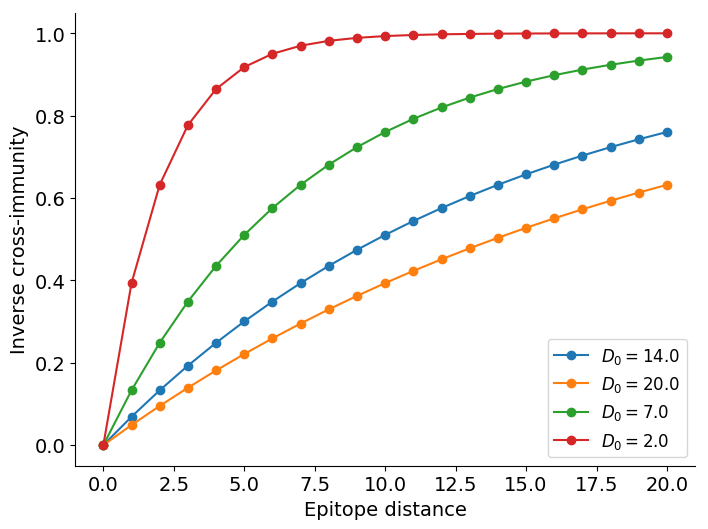

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

d_init = 14.0
ax.plot(d_ep, inverse_cross_immunity_amplitude(d_ep, d_init), marker="o", label="$D_{0} = %s$" % d_init)

d_init = 20.0
ax.plot(d_ep, inverse_cross_immunity_amplitude(d_ep, d_init), marker="o", label="$D_{0} = %s$" % d_init)

d_init = 7.0
ax.plot(d_ep, inverse_cross_immunity_amplitude(d_ep, d_init), marker="o", label="$D_{0} = %s$" % d_init)

d_init = 2.0
ax.plot(d_ep, inverse_cross_immunity_amplitude(d_ep, d_init), marker="o", label="$D_{0} = %s$" % d_init)

ax.set_xlabel("Epitope distance")
ax.set_ylabel("Inverse cross-immunity")
ax.legend()

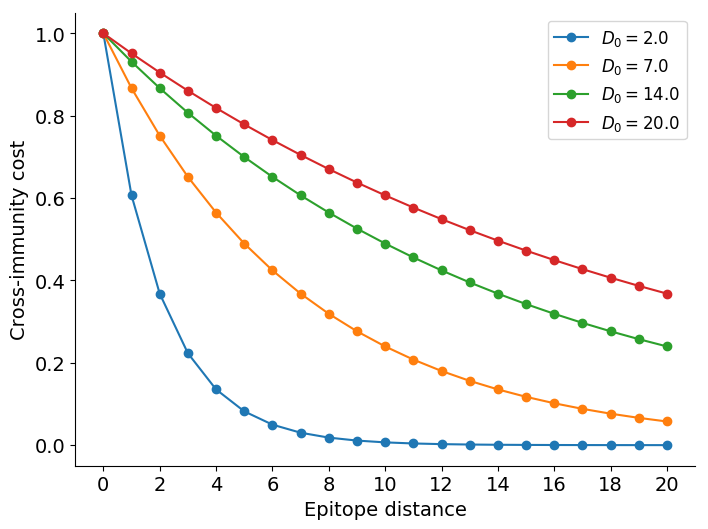

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

d_init = 2.0
ax.plot(d_ep, cross_immunity(d_ep, d_init), marker="o", label="$D_{0} = %s$" % d_init)

d_init = 7.0
ax.plot(d_ep, cross_immunity(d_ep, d_init), marker="o", label="$D_{0} = %s$" % d_init)

d_init = 14.0
ax.plot(d_ep, cross_immunity(d_ep, d_init), marker="o", label="$D_{0} = %s$" % d_init)

d_init = 20.0
ax.plot(d_ep, cross_immunity(d_ep, d_init), marker="o", label="$D_{0} = %s$" % d_init)

ax.set_xlabel("Epitope distance")
ax.set_ylabel("Cross-immunity cost")
ax.set_xticks(np.arange(0, 21, 2))

ax.legend()

In [238]:
sample_1_d_ep = np.random.poisson(size=20)

In [239]:
sample_1_d_ep

array([0, 1, 0, 0, 1, 2, 0, 2, 4, 0, 2, 3, 2, 0, 3, 0, 1, 3, 1, 1])

In [240]:
freqs = np.array([0.02] * len(sample_1_d_ep)) + np.random.normal(scale=0.005, size=len(sample_1_d_ep))

In [241]:
freqs

array([0.02395047, 0.01683328, 0.02427242, 0.01187241, 0.01233596,
       0.02143359, 0.01821777, 0.01794004, 0.01676118, 0.01736916,
       0.0183627 , 0.03459203, 0.01486345, 0.01634581, 0.02415395,
       0.02332083, 0.01380215, 0.0181515 , 0.02098827, 0.03005638])

In [292]:
d_init = 14.0

In [293]:
# Random epitope distances
-1 * sum(freqs * cross_immunity(sample_1_d_ep, d_init))

-0.33907027585494665

In [294]:
-2 * sum(freqs * cross_immunity(sample_1_d_ep, d_init))

-0.6781405517098933

In [295]:
-0.5 * sum(freqs * cross_immunity(sample_1_d_ep, d_init))

-0.16953513792747332

In [296]:
0.5 * sum(freqs * cross_immunity(sample_1_d_ep, d_init))

0.16953513792747332

In [297]:
np.exp(-1 * sum(freqs * cross_immunity(sample_1_d_ep, d_init)))

0.7124323805352734

In [298]:
# No epitope distances
-1 * sum(freqs * cross_immunity(np.zeros_like(sample_1_d_ep), d_init))

-0.3744957205501889

In [299]:
np.exp(-1 * sum(freqs * cross_immunity(np.zeros_like(sample_1_d_ep), d_init)))

0.6876359520530964

In [300]:
# Large epitope distances
-1 * sum(freqs * cross_immunity(np.ones_like(sample_1_d_ep) * 4, d_init))

-0.2814250303473347

In [301]:
np.exp(-1 * sum(freqs * cross_immunity(np.ones_like(sample_1_d_ep) * 4, d_init)))

0.7547074937131052

In [302]:
cross_immunity(sample_1_d_ep, d_init=14.0)

array([0.80711775, 0.8668779 , 1.        , 1.        , 1.        ,
       0.80711775, 0.93106278, 1.        , 0.8668779 , 0.93106278,
       0.75147729, 1.        , 0.93106278, 0.8668779 , 1.        ,
       0.93106278, 0.93106278, 0.8668779 , 0.8668779 , 0.75147729])

In [303]:
# Random epitope distances
sum(freqs * inverse_cross_immunity_amplitude(sample_1_d_ep, d_init=14.0))

0.03542544469524221

In [304]:
# No epitope distances
sum(freqs * inverse_cross_immunity_amplitude(np.zeros_like(sample_1_d_ep), d_init=14.0))

0.0

In [305]:
# Large epitope distances
sum(freqs * inverse_cross_immunity_amplitude(np.ones_like(sample_1_d_ep) * 4, d_init=14.0))

0.09307069020285419

In [270]:
d_init = 14.0

In [307]:
def generate_cross_immunity_samples(n, d_init=14.0):
    samples = []
    
    for i in range(n):
        sample_1_d_ep = np.random.poisson(size=20)
        freqs = np.array([0.02] * len(sample_1_d_ep)) + np.random.normal(scale=0.005, size=len(sample_1_d_ep))
        # Random epitope distances
        samples.append(-1 * sum(freqs * cross_immunity(sample_1_d_ep, d_init)))
        
    return np.array(samples)

def generate_inverse_cross_immunity_samples(n, d_init=14.0):
    samples = []
    
    for i in range(n):
        sample_1_d_ep = np.random.poisson(size=20)
        freqs = np.array([0.02] * len(sample_1_d_ep)) + np.random.normal(scale=0.005, size=len(sample_1_d_ep))
        # Random epitope distances
        samples.append(sum(freqs * inverse_cross_immunity_amplitude(sample_1_d_ep, d_init)))
        
    return np.array(samples)

(array([  6.,  28.,  53., 140., 234., 196., 187., 113.,  35.,   8.]),
 array([-0.44000757, -0.42734106, -0.41467455, -0.40200803, -0.38934152,
        -0.37667501, -0.3640085 , -0.35134199, -0.33867547, -0.32600896,
        -0.31334245]),
 <a list of 10 Patch objects>)

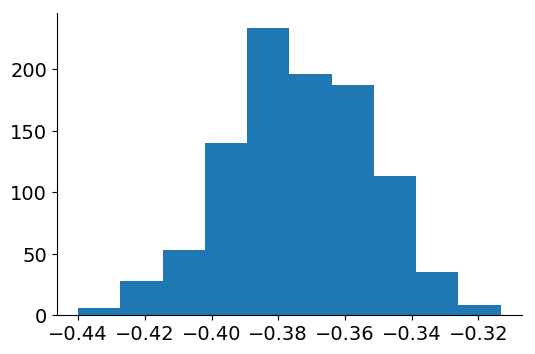

In [308]:
plt.hist(generate_cross_immunity_samples(1000))

(array([ 13.,  52., 178., 271., 221., 154.,  83.,  16.,  11.,   1.]),
 array([0.00945904, 0.01357363, 0.01768822, 0.0218028 , 0.02591739,
        0.03003198, 0.03414656, 0.03826115, 0.04237574, 0.04649032,
        0.05060491]),
 <a list of 10 Patch objects>)

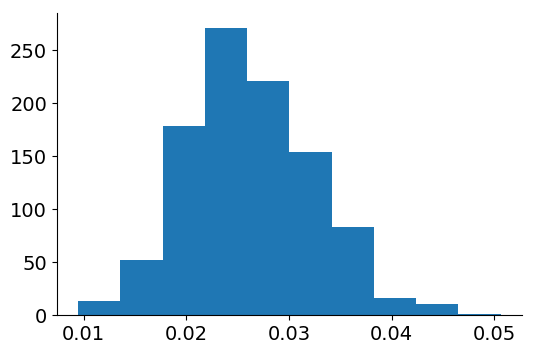

In [309]:
plt.hist(generate_inverse_cross_immunity_samples(1000))

(array([ 7.,  4., 13., 17., 16., 12., 12., 11.,  5.,  3.]),
 array([-2.07079635, -1.63215157, -1.19350678, -0.75486199, -0.31621721,
         0.12242758,  0.56107237,  0.99971715,  1.43836194,  1.87700672,
         2.31565151]),
 <a list of 10 Patch objects>)

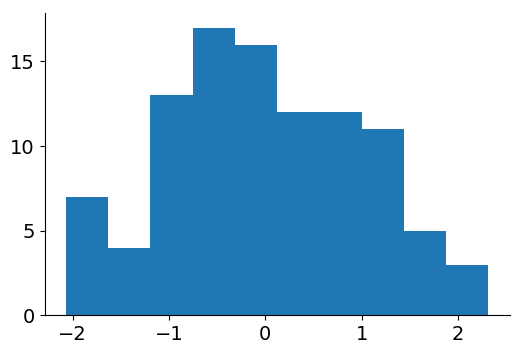

In [310]:
samples = generate_inverse_cross_immunity_samples(100)
plt.hist((samples - samples.mean()) / samples.std())

(array([ 2.,  3., 11., 13., 14., 28., 13., 12.,  1.,  3.]),
 array([-2.68173189, -2.15026574, -1.61879959, -1.08733344, -0.55586729,
        -0.02440114,  0.50706501,  1.03853116,  1.56999731,  2.10146345,
         2.6329296 ]),
 <a list of 10 Patch objects>)

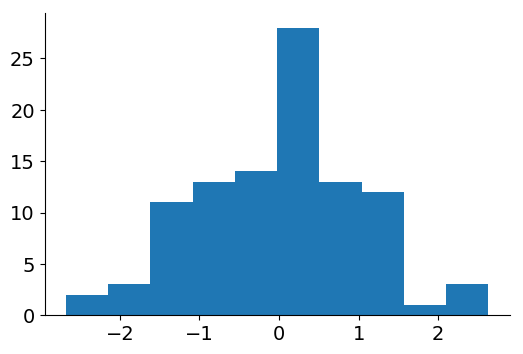

In [311]:
samples = generate_cross_immunity_samples(100)
plt.hist((samples - samples.mean()) / samples.std())

(array([  8.,  21.,  74., 150., 215., 239., 165.,  92.,  26.,  10.]),
 array([-3.11588916, -2.5036209 , -1.89135264, -1.27908438, -0.66681611,
        -0.05454785,  0.55772041,  1.16998867,  1.78225694,  2.3945252 ,
         3.00679346]),
 <a list of 10 Patch objects>)

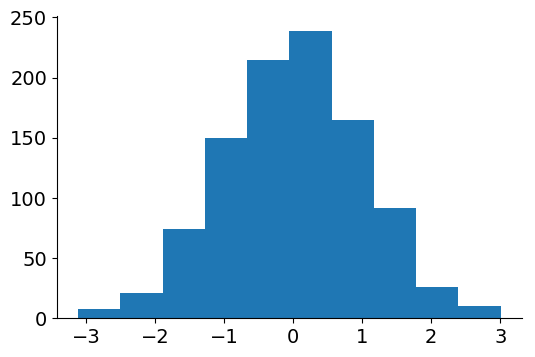

In [312]:
samples = generate_cross_immunity_samples(1000)
plt.hist((samples - samples.mean()) / samples.std())

(array([  2.,  10.,  19.,  81., 166., 277., 241., 132.,  57.,  15.]),
 array([-3.82953446, -3.16920182, -2.50886919, -1.84853656, -1.18820393,
        -0.5278713 ,  0.13246134,  0.79279397,  1.4531266 ,  2.11345923,
         2.77379187]),
 <a list of 10 Patch objects>)

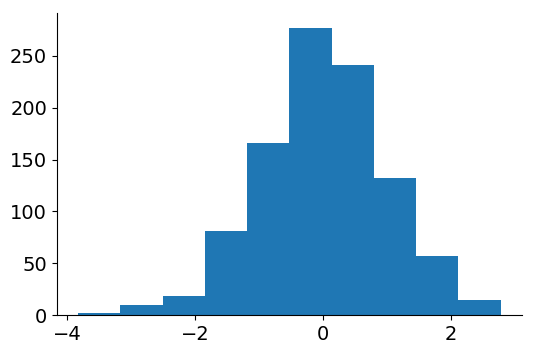

In [313]:
samples = generate_cross_immunity_samples(1000, d_init=2.0)
plt.hist((samples - samples.mean()) / samples.std())

(array([  6.,  27.,  68., 137., 253., 196., 166., 109.,  30.,   8.]),
 array([-3.08846202, -2.48645745, -1.88445288, -1.28244831, -0.68044374,
        -0.07843918,  0.52356539,  1.12556996,  1.72757453,  2.32957909,
         2.93158366]),
 <a list of 10 Patch objects>)

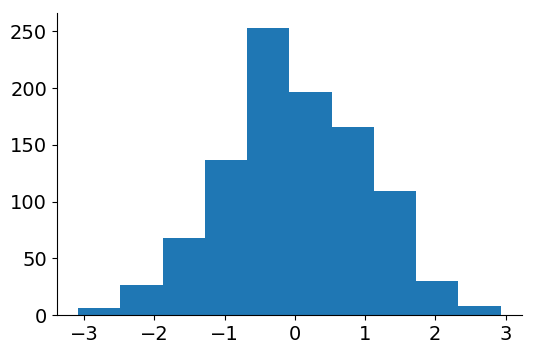

In [314]:
samples = generate_cross_immunity_samples(1000, d_init=20.0)
plt.hist((samples - samples.mean()) / samples.std())